# The problem Statement 
## To build a ml model that will predict a passenger would have survived or not based on the given characterstics  

### The Questions ?

The data is about the passengenrs onboard the titanic ship
1. What are some reasonable features that would have contributed to their death ?
2. May be some unreasonable features that would have contributed to their death 

In [84]:
import pandas as pd 
import numpy as np

In [2]:
data_train = pd.read_csv('../datasets/titanic/tit_train.csv')
gender_submission = pd.read_csv('../datasets/titanic/gender_submission.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
''' 
Column Description

PassengerId: unique identifier for each passenger
Survived: whether the passenger survived (1) or not (0)
Pclass: passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
Name: name of the passenger
Sex: gender of the passenger
Age: age of the passenger (in years)
SibSp: number of siblings or spouses aboard the Titanic
Parch: number of parents or children aboard the Titanic
Ticket: ticket number
Fare: passenger fare
Cabin: cabin number
Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    
    
    
    features reasonable -> Pclass , Sex, Age, fare(diff class), cabin number (near the exit or not), sibsp, parch, ->gets the number of passenger
    unresonable -> pass id(just for unique ness), name,  ticket, embarked(maybe)
'''

''' 
    Are the features i classified reasonable ?
    are unreasonable feature really unreasonable and which are reasonable?
'''

In [18]:
data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [12]:
data_train[['PassengerId', 'Name', 'Sex']]

,PassengerId,Name,Sex
0,1,"Braund, Mr. Owen Harris",male
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,"Allen, Mr. William Henry",male
...,...,...,...
886,887,"Montvila, Rev. Juozas",male
887,888,"Graham, Miss. Margaret Edith",female
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,890,"Behr, Mr. Karl Howell",male


In [59]:
surname = data_train.loc[409, 'Name'].split(',')[0]

# Iterate over all rows to find passengers with the same surname
for i in range(len(data_train)):
    # Get the surname of the current passenger
    current_surname = data_train.loc[i, 'Name'].split(',')[0]
    
    # Check if they share the same surname
    if current_surname == surname:
        # Check if siblings or parents are in the same cabin
        if data_train.loc[i, 'Cabin'] == data_train.loc[409, 'Cabin'] or data_train.loc[i, 'Cabin'] == 'NaN':
            print(data_train.loc[i])
        else: 
            print(data_train.loc[i])
### so the sliblings and parents  are different passenger id
### check if they are in same cabin
## siblings are probably in the same cabin

PassengerId                              177
Survived                                   0
Pclass                                     3
Name           Lefebre, Master. Henry Forbes
Sex                                     male
Age                                      NaN
SibSp                                      3
Parch                                      1
Ticket                                  4133
Fare                                 25.4667
Cabin                                    NaN
Embarked                                   S
Name: 176, dtype: object
PassengerId                        230
Survived                             0
Pclass                               3
Name           Lefebre, Miss. Mathilde
Sex                             female
Age                                NaN
SibSp                                3
Parch                                1
Ticket                            4133
Fare                           25.4667
Cabin                              NaN
Embark

In [74]:
test = data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q


In [91]:
data_train['first_Name'] = np.strings
data_train['last_Name'] = np.strings
for i in range(len(data_train.Name)):
    name = data_train.loc[i].Name.split(', ')
    first , last = name[1] , name[0]
    data_train.loc[i, 'first_Name'] = first
    data_train.loc[i,'last_Name'] = last
    ##print(data_train.loc[i])

    ##name = test.Name.split(', ')
    ##last, first = name[0], name[1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_Name,last_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr. James,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr. Timothy J,McCarthy
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master. Gosta Leonard,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs. Nicholas (Adele Achem),Nasser


In [95]:
## sort the dataframe according to last name
data_train = data_train.sort_values('last_Name')
data_train.loc[data_train['Cabin'].notna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,first_Name,last_Name
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,Miss. Elisabeth Walton,Allen
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,Mrs. Hudson J C (Bessie Waldo Daniels),Allison
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Miss. Helen Loraine,Allison
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Master. Hudson Trevor,Allison
460,461,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,Mr. Harry,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.00,0,2,36928,164.8667,C7,S,Miss. Mary Natalie,Wick
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C,Mr. Harry Elkins,Widener
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,Mr. Fletcher Fellows,Williams-Lambert
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,Mr. Hugh,Woolner


<BarContainer object of 2 artists>

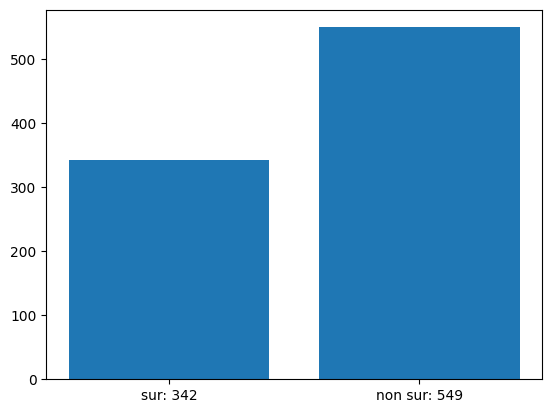

In [117]:
## plot survivours vs non survivours
import matplotlib.pyplot as plt

s = 0
ns  = 0

for i in range(len(data_train.Name)):
    if data_train.loc[i].Survived == 1:
        s+=1
    else:
        ns+=1

fig, ax = plt.subplots()

ax.bar([f'sur: {s}', f'non sur: {ns}'], [s, ns])

In [122]:
data_train.shape

(891, 14)

In [ ]:
##features reasonable -> Pclass , Sex, Age, fare(diff class), cabin number (near the exit or not), sibsp, parch, ->gets the number of passenger

In [166]:
## pclass vs survived
print(data_train.info())
pclass = data_train.Pclass.unique()
gender = data_train.Sex.unique()
age = data_train.Age.unique()
embarked = data_train.Embarked.unique()
print(gender, pclass, age, embarked)
## no nan for pclass

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 845 to 868
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  first_Name   891 non-null    object 
 13  last_Name    891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 136.7+ KB
None
['male' 'female'] [3 2 1] [42.   35.   16.   28.   30.   26.   40.   18.   20.   25.   24.   29.
  2.    0.92 19.   48.    9.   39.   17.   27.   11.    4.  

In [167]:
ps_class = [0, 0, 0]
ps_age = np.zeros(len(age))
ps_gender = np.zeros(len(gender))
ps_embarked = np.zeros(len(embarked))

for i in range(len(data_train.Pclass)):
    r = data_train.loc[i]
    for j in range(len(pclass)):
        if r.Pclass == pclass[j]:
            ps_class[j]+=1 
    for j in range(len(ps_gender)):
        if r.Sex == gender[j]:
            ps_gender[j]+=1
    for j in range(len(ps_age)):
        if r.Age == age[j]:
            ps_age[j]+=1
    for j in range(len(ps_embarked)):
        if r.Embarked == embarked[j]:
            ps_embarked[j]+=1


In [168]:
print(ps_embarked, ps_age, ps_class, ps_gender)

[644. 168.  77.   0.] [13. 18. 17. 25. 25. 18. 13. 26. 15. 23. 30. 20. 10.  1. 25.  9.  8. 14.
 13. 18.  4. 10.  3.  2. 22.  1.  2.  6.  4. 11. 15.  2. 15. 18.  2. 12.
  1. 27.  7.  0. 10.  7.  6.  9. 15. 24.  5.  9.  4.  6.  2.  6.  8.  3.
  6. 17.  4.  1.  5.  2.  2.  3.  6.  5.  2.  2.  1.  1.  4.  3.  2.  2.
  1.  1.  2.  1.  2.  1.  1.  2.  3.  2.  4.  1.  2.  1.  1.  1.  1.] [491, 184, 216] [577. 314.]


<BarContainer object of 3 artists>

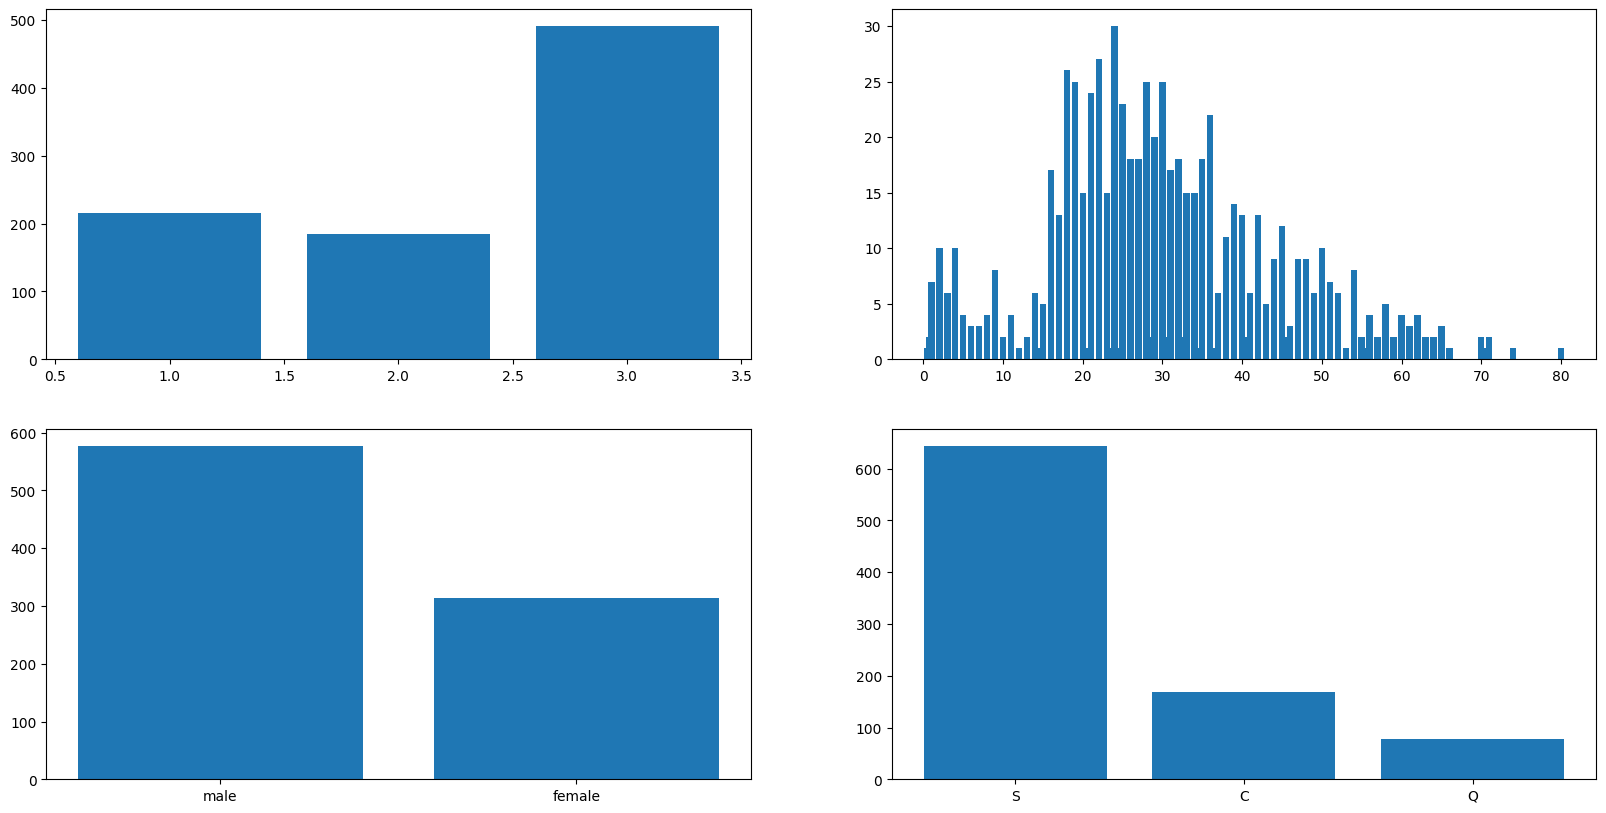

<Figure size 2000x1000 with 0 Axes>

In [174]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plt.figure(figsize=(20, 10))
ax[0][0].bar(pclass, ps_class)
ax[0][1].bar(age, ps_age)
ax[1][0].bar(gender, ps_gender)
embarked = embarked[:3]
ps_embarked = ps_embarked[:3]
ax[1][1].bar(embarked, ps_embarked)
#pclass 3 people have survived more


In [153]:
## pclass -> 3 > 1> 2
## age 20 -> 35
## male > female
## embarked s> c> q

/tmp/ipykernel_207924/2981388092.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [179]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## check if same family memebers contribute to survivours 

In [ ]:
df = data_train.drop('Fare', axis=1)
df = df.drop('Name', axis=1)
data_train = df.drop('PassengerId', axis=1)
data_train = df.drop('Cabin', axis=1)

KeyError: "['Fare'] not found in axis"

In [187]:
df = df.drop('Cabin', axis=1)

In [188]:
fig, axs = plt.subplots()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,first_Name,last_Name
845,846,0,3,male,42.0,0,0,C.A. 5547,S,Mr. Anthony,Abbing
279,280,1,3,female,35.0,1,1,C.A. 2673,S,Mrs. Stanton (Rosa Hunt),Abbott
746,747,0,3,male,16.0,1,1,C.A. 2673,S,Mr. Rossmore Edward,Abbott
874,875,1,2,female,28.0,1,0,P/PP 3381,C,Mrs. Samuel (Hannah Wizosky),Abelson
308,309,0,2,male,30.0,1,0,P/PP 3381,C,Mr. Samuel,Abelson
...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,male,30.0,0,0,345774,S,Mr. Theodore,de Mulder
282,283,0,3,male,16.0,0,0,345778,S,Mr. Alfons,de Pelsmaeker
361,362,0,2,male,29.0,1,0,SC/PARIS 2167,C,Mr. Sebastiano,del Carlo
153,154,0,3,male,40.5,0,2,A/5. 851,S,Mr. Austin Blyler,van Billiard


In [192]:
df = df.drop('Ticket', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,first_Name,last_Name
845,846,0,3,male,42.0,0,0,S,Mr. Anthony,Abbing
279,280,1,3,female,35.0,1,1,S,Mrs. Stanton (Rosa Hunt),Abbott
746,747,0,3,male,16.0,1,1,S,Mr. Rossmore Edward,Abbott
874,875,1,2,female,28.0,1,0,C,Mrs. Samuel (Hannah Wizosky),Abelson
308,309,0,2,male,30.0,1,0,C,Mr. Samuel,Abelson
...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,male,30.0,0,0,S,Mr. Theodore,de Mulder
282,283,0,3,male,16.0,0,0,S,Mr. Alfons,de Pelsmaeker
361,362,0,2,male,29.0,1,0,C,Mr. Sebastiano,del Carlo
153,154,0,3,male,40.5,0,2,S,Mr. Austin Blyler,van Billiard


Overall Survival Probability: 0.38
Average Survival Probability for Families with Survivors: 0.93
Average Survival Probability for Families without Survivors: 0.00


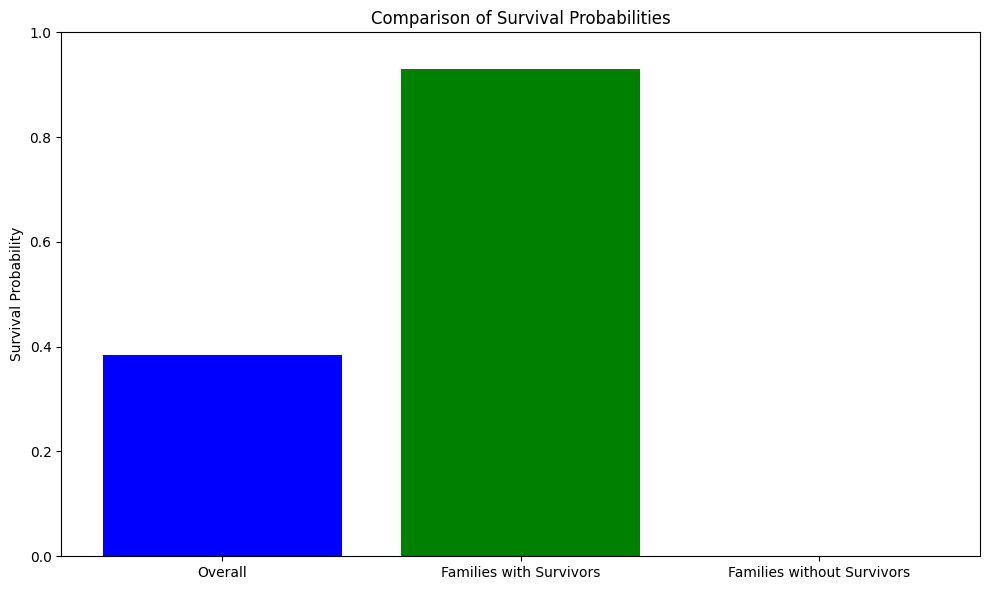

In [196]:
df['FamilyID'] = df['last_Name'] + '_' + df['SibSp'].astype(str) + '_' + df['Parch'].astype(str)

# Calculate the survival probability for each family
family_survival = df.groupby('FamilyID')['Survived'].mean()

# Separate families with survivors and families without survivors
families_with_survivors = family_survival[family_survival > 0]
families_without_survivors = family_survival[family_survival == 0]

# Calculate overall survival probability
overall_survival_prob = df['Survived'].mean()

# Compare probabilities
print(f"Overall Survival Probability: {overall_survival_prob:.2f}")
print(f"Average Survival Probability for Families with Survivors: {families_with_survivors.mean():.2f}")
print(f"Average Survival Probability for Families without Survivors: {families_without_survivors.mean():.2f}")

# Plot survival probabilities
plt.figure(figsize=(10, 6))
plt.bar(['Overall', 'Families with Survivors', 'Families without Survivors'],
        [overall_survival_prob, families_with_survivors.mean(), families_without_survivors.mean()],
        color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('Survival Probability')
plt.title('Comparison of Survival Probabilities')
plt.ylim(0, 1)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
## if one ofthe family member is survived then there is a high prob that others also survived

In [199]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [202]:
df['Embarked'].mode()[0]

'S'

In [203]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [204]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
first_Name     0
last_Name      0
FamilyID       0
dtype: int64

In [205]:
import seaborn as sns


In [207]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [213]:
df_filterd['Embarked'] = df_filterd['Embarked'].map({'S': 0, 'P': 1, 'Q': 2})

In [217]:
columns_to_exclude = ['first_Name', 'last_Name']
df_filterd = df.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [221]:
df_filterd =  df_filterd.drop('FamilyID', axis=1)

In [222]:
df_filterd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 845 to 868
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     723 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 94.9 KB


<Axes: >

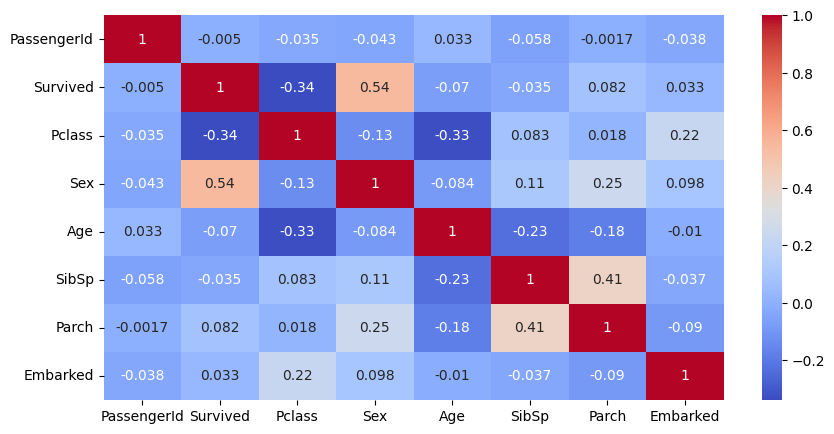

In [226]:
corr = df_filterd.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr,annot=True,cmap='coolwarm' )
